In [290]:
import requests  

import pandas as pd 
from pandas.io.json import json_normalize

import numpy as np

from geopy.geocoders import Nominatim 
import geocoder 

import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

import folium

import matplotlib.pyplot as plt


In [214]:
CLIENT_ID = 'IRNDM0FF5HHW4I3AACXII3TW5ZOUJOUNK0QHJLFFSJ5ITPZE' # your Foursquare ID
CLIENT_SECRET = 'THW2UZ4OV0ISDLZW4V4OT5C0UWQQK10LZTJQ1QJKFTZ2KUZJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IRNDM0FF5HHW4I3AACXII3TW5ZOUJOUNK0QHJLFFSJ5ITPZE
CLIENT_SECRET:THW2UZ4OV0ISDLZW4V4OT5C0UWQQK10LZTJQ1QJKFTZ2KUZJ


In [215]:
address = 'Bangkok'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Bangkok are 13.7544238, 100.4930399.


In [216]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [217]:
results = requests.get(url).json()["response"]['groups'][0]['items']
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b0587f9f964a52001aa22e3',
   'name': 'Temple of the Emerald Buddha (วัดพระศรีรัตนศาสดาราม (วัดพระแก้ว))',
   'location': {'address': 'Na Phra Lan Rd',
    'crossStreet': 'Maha Rat Rd',
    'lat': 13.751734643691861,
    'lng': 100.49265146255493,
    'labeledLatLngs': [{'label': 'display',
      'lat': 13.751734643691861,
      'lng': 100.49265146255493}],
    'distance': 302,
    'postalCode': '10200',
    'cc': 'TH',
    'city': 'พระนคร',
    'state': 'กรุงเทพมหานคร',
    'country': 'ประเทศไทย',
    'formattedAddress': ['Na Phra Lan Rd (Maha Rat Rd)',
     'พระนคร',
     'กรุงเทพมหานคร 10200',
     'ประเทศไทย']},
   'categories': [{'id': '52e81612bcbc57f1066b7a3e',
     'name': 'Buddhist Temple',
     'pluralName': 'Buddhist Temples',
     'shortName': 'Buddhist Temple',
     'icon': {'prefix': 'https://ss3.4sqi.net/im

In [218]:
bangkok_distinct_url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok'
r = requests.get(bangkok_distinct_url)
df_list = pd.read_html(r.text)
df = df_list[0]
df.head()

,District(Khet),MapNr,Post-code,Thai,Popu-lation,No. ofSubdis-trictsKhwaeng,Latitude,Longitude
0,Bang Bon,50,10150,บางบอน,105161,4,13.659200,100.399100
1,Bang Kapi,6,10240,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,10160,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,10220,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,10120,บางคอแหลม,94956,3,13.693333,100.502500


In [219]:
df = df.rename(columns={"District(Khet)": "District", "Post-code": "Postcode", "Popu-lation": "Population", "No. ofSubdis-trictsKhwaeng": "No. of Subdistricts"})
df.head()

,District,MapNr,Postcode,Thai,Population,No. of Subdistricts,Latitude,Longitude
0,Bang Bon,50,10150,บางบอน,105161,4,13.659200,100.399100
1,Bang Kapi,6,10240,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,10160,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,10220,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,10120,บางคอแหลม,94956,3,13.693333,100.502500


In [220]:
df.drop(['MapNr'], axis=1, inplace=True)

In [221]:
df.head()

,District,Postcode,Thai,Population,No. of Subdistricts,Latitude,Longitude
0,Bang Bon,10150,บางบอน,105161,4,13.659200,100.399100
1,Bang Kapi,10240,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,10160,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,10220,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,10120,บางคอแหลม,94956,3,13.693333,100.502500


In [222]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, district in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [223]:
bangkok_distinct_url = 'https://en.wikipedia.org/wiki/Khwaeng'
r = requests.get(bangkok_distinct_url)
df_list = pd.read_html(r.text)
df_sub_distincts = df_list[0]
df_sub_distincts.head()

District (Khet)                                           \
            Notes Unnamed: 1_level_1    Unnamed: 2_level_1   
0            Code               Name  Name (Thai Alphabet)   
1              01        Phra Nakhon                พระนคร   
2              01        Phra Nakhon                พระนคร   
3              01        Phra Nakhon                พระนคร   
4              01        Phra Nakhon                พระนคร   

  Subdistrict (Khwaeng)                                                    \
     Unnamed: 3_level_1          Unnamed: 4_level_1    Unnamed: 5_level_1   
0                  Code                        Name  Name (Thai Alphabet)   
1                    01  Phra Borom Maha Ratchawang       พระบรมมหาราชวัง   
2                    02         Wang Burapha Phirom        วังบูรพาภิรมย์   
3                    03            Wat Ratchabophit            วัดราชบพิธ   
4                    04                  Samran Rat           สำราญราษฎร์   

               Notes  
  Unnamed: 6_level_1  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [224]:
df_sub_distincts.columns

MultiIndex([(      'District (Khet)',              'Notes'),
            (      'District (Khet)', 'Unnamed: 1_level_1'),
            (      'District (Khet)', 'Unnamed: 2_level_1'),
            ('Subdistrict (Khwaeng)', 'Unnamed: 3_level_1'),
            ('Subdistrict (Khwaeng)', 'Unnamed: 4_level_1'),
            ('Subdistrict (Khwaeng)', 'Unnamed: 5_level_1'),
            (                'Notes', 'Unnamed: 6_level_1')],
           )

In [225]:
df_sub_distincts.columns = ['_'.join(col) for col in df_sub_distincts.columns.values]

In [226]:
df_sub_distincts.head()

,District (Khet)_Notes,District (Khet)_Unnamed: 1_level_1,District (Khet)_Unnamed: 2_level_1,Subdistrict (Khwaeng)_Unnamed: 3_level_1,Subdistrict (Khwaeng)_Unnamed: 4_level_1,Subdistrict (Khwaeng)_Unnamed: 5_level_1,Notes_Unnamed: 6_level_1
0,Code,Name,Name (Thai Alphabet),Code,Name,Name (Thai Alphabet),NaN
1,01,Phra Nakhon,พระนคร,01,Phra Borom Maha Ratchawang,พระบรมมหาราชวัง,NaN
2,01,Phra Nakhon,พระนคร,02,Wang Burapha Phirom,วังบูรพาภิรมย์,NaN
3,01,Phra Nakhon,พระนคร,03,Wat Ratchabophit,วัดราชบพิธ,NaN
4,01,Phra Nakhon,พระนคร,04,Samran Rat,สำราญราษฎร์,NaN


In [227]:
df_sub_distincts.columns

Index(['District (Khet)_Notes', 'District (Khet)_Unnamed: 1_level_1',
       'District (Khet)_Unnamed: 2_level_1',
       'Subdistrict (Khwaeng)_Unnamed: 3_level_1',
       'Subdistrict (Khwaeng)_Unnamed: 4_level_1',
       'Subdistrict (Khwaeng)_Unnamed: 5_level_1', 'Notes_Unnamed: 6_level_1'],
      dtype='object')

In [228]:
df_sub_distincts.drop(['Notes_Unnamed: 6_level_1', 'District (Khet)_Unnamed: 2_level_1', 'Subdistrict (Khwaeng)_Unnamed: 5_level_1'], axis=1, inplace=True)

In [229]:
df_sub_distincts = df_sub_distincts.rename(columns={"District (Khet)_Notes": "District Code",
                                                    "District (Khet)_Unnamed: 1_level_1": "District Name",
                                                    "Subdistrict (Khwaeng)_Unnamed: 3_level_1": "Subdistrict Code",
                                                    "Subdistrict (Khwaeng)_Unnamed: 4_level_1": "Subdistrict Name"
                                                   })


In [230]:
df_sub_distincts

,District Code,District Name,Subdistrict Code,Subdistrict Name
0,Code,Name,Code,Name
1,01,Phra Nakhon,01,Phra Borom Maha Ratchawang
2,01,Phra Nakhon,02,Wang Burapha Phirom
3,01,Phra Nakhon,03,Wat Ratchabophit
4,01,Phra Nakhon,04,Samran Rat
...,...,...,...,...
176,49,Thung Khru,02,Thung Khru
177,50,Bang Bon,02,Bang Bon Nuea
178,50,Bang Bon,03,Bang Bon Tai
179,50,Bang Bon,04,Khlong Bang Phran


In [231]:
df_sub_distincts.drop(axis=0, index=0, inplace=True)

In [232]:
df_sub_distincts

,District Code,District Name,Subdistrict Code,Subdistrict Name
1,01,Phra Nakhon,01,Phra Borom Maha Ratchawang
2,01,Phra Nakhon,02,Wang Burapha Phirom
3,01,Phra Nakhon,03,Wat Ratchabophit
4,01,Phra Nakhon,04,Samran Rat
5,01,Phra Nakhon,05,San Chaopho Suea
...,...,...,...,...
176,49,Thung Khru,02,Thung Khru
177,50,Bang Bon,02,Bang Bon Nuea
178,50,Bang Bon,03,Bang Bon Tai
179,50,Bang Bon,04,Khlong Bang Phran


In [233]:
LIMIT = 100
radius = 500
lat = 13.659200
lon = 100.399100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lon, 
    radius, 
    LIMIT)

In [234]:
results_bangbon = requests.get(url).json()["response"]['groups'][0]['items']
results_bangbon

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4e880a81f790e992e01d7284',
   'name': 'ขาหมูบางหว้า',
   'location': {'address': 'Ekkachai 108',
    'lat': 13.657136,
    'lng': 100.39523,
    'labeledLatLngs': [{'label': 'display',
      'lat': 13.657136,
      'lng': 100.39523}],
    'distance': 477,
    'postalCode': '10150',
    'cc': 'TH',
    'neighborhood': 'Bang Bon',
    'city': 'บางบอน',
    'state': 'กรุงเทพมหานคร',
    'country': 'ประเทศไทย',
    'formattedAddress': ['Ekkachai 108',
     'บางบอน',
     'กรุงเทพมหานคร 10150',
     'ประเทศไทย']},
   'categories': [{'id': '4bf58dd8d48988d149941735',
     'name': 'Thai Restaurant',
     'pluralName': 'Thai Restaurants',
     'shortName': 'Thai',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},


In [235]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [236]:
df = getNearbyVenues(names=df['District'], 
                    latitudes=df['Latitude'], 
                    longitudes=df['Longitude'])

In [237]:
df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.6592,100.3991,Lotus Express (โลตัส เอ็กซ์เพรส),13.657839,100.397243,Convenience Store
3,Bang Bon,13.6592,100.3991,Tesco Lotus Express thanon ekkachai bangbon,13.657758,100.397366,Shopping Mall
4,Bang Bon,13.6592,100.3991,Lotus Express Bongbon,13.657630,100.397325,Grocery Store


In [238]:
df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.659200,100.399100,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.659200,100.399100,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.659200,100.399100,Lotus Express (โลตัส เอ็กซ์เพรส),13.657839,100.397243,Convenience Store
3,Bang Bon,13.659200,100.399100,Tesco Lotus Express thanon ekkachai bangbon,13.657758,100.397366,Shopping Mall
4,Bang Bon,13.659200,100.399100,Lotus Express Bongbon,13.657630,100.397325,Grocery Store
...,...,...,...,...,...,...,...
1157,Yan Nawa,13.696944,100.543056,Lavita Coffee,13.698132,100.540867,Coffee Shop
1158,Yan Nawa,13.696944,100.543056,Food Court,13.696740,100.541071,Food Court
1159,Yan Nawa,13.696944,100.543056,KFC (เคเอฟซี),13.700420,100.540930,Fast Food Restaurant
1160,Yan Nawa,13.696944,100.543056,Rumruay Pochana (ร่ำรวยโภชนา),13.699501,100.541553,Chinese Restaurant


In [239]:
# df.to_csv(index=False, encoding="utf-8")

In [240]:
compression_opts = dict(method='zip',
                        archive_name='bkk.csv')  
df.to_csv('bkk.zip', index=False,
          compression=compression_opts, encoding='utf-8-sig')  

In [241]:
siam = (13.7438306,100.5151677)

In [242]:
siam

(13.7438306, 100.5151677)

In [243]:
df.groupby(['Neighborhood'])['Venue'].count()

Neighborhood
Bang Bon                 7
Bang Kapi               19
Bang Khae               14
Bang Khen               14
Bang Kho Laem           17
Bang Khun Thian         44
Bang Na                  7
Bang Phlat              11
Bang Rak                26
Bang Sue                14
Bangkok Noi             25
Bangkok Yai             20
Bueng Kum                6
Chatuchak               25
Chom Thong               5
Din Daeng               10
Don Mueang              10
Dusit                   18
Huai Khwang             23
Khan Na Yao             47
Khlong Sam Wa            8
Khlong San              52
Khlong Toei              8
Lak Si                  28
Lat Krabang              8
Lat Phrao               25
Min Buri                 7
Nong Chok                8
Nong Khaem               6
Pathum Wan              82
Phasi Charoen           45
Phaya Thai              89
Phra Khanong            25
Phra Nakhon             39
Pom Prap Sattru Phai    38
Prawet                   8
Rat Burana     

In [244]:
df.groupby(['Venue Category'])['Venue Category'].count().sort_values(ascending=False)

Venue Category
Noodle House         126
Convenience Store     80
Coffee Shop           79
Thai Restaurant       74
Café                  53
                    ... 
Pastry Shop            1
Gaming Cafe            1
Garden                 1
Garden Center          1
Women's Store          1
Name: Venue Category, Length: 164, dtype: int64

In [245]:
df.loc[df['Venue Category']=='Thai Restaurant']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.659200,100.399100,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
25,Bang Kapi,13.765833,100.647778,ครัว ณ ราม,13.763695,100.650798,Thai Restaurant
51,Bang Khen,13.873889,100.596389,Ban Suan Klang Soi (บ้านสวนกลางซอย),13.874157,100.600090,Thai Restaurant
55,Bang Kho Laem,13.693333,100.502500,Baan Klang Krung (บ้านกลางกรุง),13.690974,100.503151,Thai Restaurant
56,Bang Kho Laem,13.693333,100.502500,ห้องอาหารจันทร์เพ็ญ,13.692355,100.504234,Thai Restaurant
...,...,...,...,...,...,...,...
1085,Wang Thonglang,13.786400,100.608700,Tanu's Kitchen,13.789265,100.608255,Thai Restaurant
1086,Wang Thonglang,13.786400,100.608700,เชียงคาน,13.789514,100.608936,Thai Restaurant
1128,Watthana,13.742222,100.585833,Mantana Cuisine (ครัวมัณฑนา),13.743758,100.588570,Thai Restaurant
1141,Yan Nawa,13.696944,100.543056,Ruentong (เรือนทอง),13.695640,100.546152,Thai Restaurant


In [246]:
df.loc[df['Venue Category']=='Thai Restaurant'].groupby(['Neighborhood'])['Venue'].count()

Neighborhood
Bang Bon                1
Bang Kapi               1
Bang Khen               1
Bang Kho Laem           3
Bang Khun Thian         3
Bang Phlat              1
Bang Rak                2
Bang Sue                3
Bangkok Noi             1
Bangkok Yai             1
Chatuchak               3
Chom Thong              1
Din Daeng               1
Don Mueang              2
Huai Khwang             1
Khan Na Yao             3
Khlong Sam Wa           1
Khlong San              3
Lak Si                  2
Lat Krabang             2
Lat Phrao               1
Min Buri                1
Nong Chok               1
Pathum Wan              5
Phaya Thai              9
Phra Nakhon             3
Pom Prap Sattru Phai    1
Rat Burana              3
Ratchathewi             1
Sai Mai                 1
Samphanthawong          1
Saphan Sung             1
Sathon                  2
Suan Luang              2
Thawi Watthana          1
Wang Thonglang          2
Watthana                1
Yan Nawa                2

In [247]:
df.loc[df['Venue Category']=='Bubble Tea Shop']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
735,Phra Khanong,13.702222,100.601667,KOI Thé (โคอิเตะ),13.705526,100.601299,Bubble Tea Shop


In [248]:
x = df.groupby(['Venue Category'])['Venue Category'].count().sort_values(ascending=False)

In [249]:
x.keys()

Index(['Noodle House', 'Convenience Store', 'Coffee Shop', 'Thai Restaurant',
       'Café', 'Asian Restaurant', 'Japanese Restaurant', 'Chinese Restaurant',
       'Hotel', 'Dessert Shop',
       ...
       'Frozen Yogurt Shop', 'Photography Studio', 'Organic Grocery',
       'Pharmacy', 'Pedestrian Plaza', 'Pastry Shop', 'Gaming Cafe', 'Garden',
       'Garden Center', 'Women's Store'],
      dtype='object', name='Venue Category', length=164)

In [250]:
x['American Restaurant']

2

In [251]:
y = []

for k in x.keys():
    y.append({'Venue Category': k, 'Count': x[k]})
    
y

[{'Venue Category': 'Noodle House', 'Count': 126},
 {'Venue Category': 'Convenience Store', 'Count': 80},
 {'Venue Category': 'Coffee Shop', 'Count': 79},
 {'Venue Category': 'Thai Restaurant', 'Count': 74},
 {'Venue Category': 'Café', 'Count': 53},
 {'Venue Category': 'Asian Restaurant', 'Count': 45},
 {'Venue Category': 'Japanese Restaurant', 'Count': 33},
 {'Venue Category': 'Chinese Restaurant', 'Count': 32},
 {'Venue Category': 'Hotel', 'Count': 29},
 {'Venue Category': 'Dessert Shop', 'Count': 27},
 {'Venue Category': 'Som Tum Restaurant', 'Count': 22},
 {'Venue Category': 'Hotpot Restaurant', 'Count': 21},
 {'Venue Category': 'Fast Food Restaurant', 'Count': 20},
 {'Venue Category': 'BBQ Joint', 'Count': 19},
 {'Venue Category': 'Bakery', 'Count': 18},
 {'Venue Category': 'Seafood Restaurant', 'Count': 16},
 {'Venue Category': 'Steakhouse', 'Count': 16},
 {'Venue Category': 'Shopping Mall', 'Count': 16},
 {'Venue Category': 'Bar', 'Count': 13},
 {'Venue Category': 'Ice Cream Sho

In [252]:
df2 = pd.DataFrame(y)
df2.head()

,Venue Category,Count
0,Noodle House,126
1,Convenience Store,80
2,Coffee Shop,79
3,Thai Restaurant,74
4,Café,53


In [253]:
x1 = pd.DataFrame(x)

In [254]:
x1

,Venue Category
Venue Category,
Noodle House,126
Convenience Store,80
Coffee Shop,79
Thai Restaurant,74
Café,53
...,...
Pastry Shop,1
Gaming Cafe,1
Garden,1


In [255]:
compression_opts = dict(method='zip',
                        archive_name='bkk2.csv')  
df2.to_csv('bkk2.zip', index=False,
          compression=compression_opts, encoding='utf-8-sig')  

In [256]:
# df.plot(
#     kind='scatter'
#     x=''
#     y=''
# )

# plt.title('')
# plt.xlabel('')
# plt.ylabel('')

# plt.show()

In [257]:
food_category = '4d4b7105d754a06374d81259'

In [259]:
restaurant_words = ['restaurant', 'food', 'noodle', 'diner', 'steakhouse', 'pizza', 'donut', 'salad']

In [258]:
def is_restaurant(categories, specific_filter=None):
    restaurant_words = ['restaurant', 'food', 'noodle', 'diner', 'steakhouse', 'pizza']
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

In [260]:
def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [270]:
a = df.loc[df['Venue Category']=='Thai Restaurant'].groupby(['Neighborhood'])['Venue'].count().sort_values(ascending=False)

In [292]:
b = []

for k in a.keys():
    b.append({'Distict': k, 'Venue Count': a[k]})
    
b

[{'Distict': 'Phaya Thai', 'Venue Count': 9},
 {'Distict': 'Pathum Wan', 'Venue Count': 5},
 {'Distict': 'Khan Na Yao', 'Venue Count': 3},
 {'Distict': 'Bang Kho Laem', 'Venue Count': 3},
 {'Distict': 'Bang Khun Thian', 'Venue Count': 3},
 {'Distict': 'Bang Sue', 'Venue Count': 3},
 {'Distict': 'Rat Burana', 'Venue Count': 3},
 {'Distict': 'Phra Nakhon', 'Venue Count': 3},
 {'Distict': 'Chatuchak', 'Venue Count': 3},
 {'Distict': 'Khlong San', 'Venue Count': 3},
 {'Distict': 'Lat Krabang', 'Venue Count': 2},
 {'Distict': 'Wang Thonglang', 'Venue Count': 2},
 {'Distict': 'Suan Luang', 'Venue Count': 2},
 {'Distict': 'Sathon', 'Venue Count': 2},
 {'Distict': 'Lak Si', 'Venue Count': 2},
 {'Distict': 'Yan Nawa', 'Venue Count': 2},
 {'Distict': 'Don Mueang', 'Venue Count': 2},
 {'Distict': 'Bang Rak', 'Venue Count': 2},
 {'Distict': 'Khlong Sam Wa', 'Venue Count': 1},
 {'Distict': 'Ratchathewi', 'Venue Count': 1},
 {'Distict': 'Watthana', 'Venue Count': 1},
 {'Distict': 'Bang Khen', 'Venue

In [293]:
df3 = pd.DataFrame(b)
df3

,Distict,Venue Count
0,Phaya Thai,9
1,Pathum Wan,5
2,Khan Na Yao,3
3,Bang Kho Laem,3
4,Bang Khun Thian,3
5,Bang Sue,3
6,Rat Burana,3
7,Phra Nakhon,3
8,Chatuchak,3
9,Khlong San,3


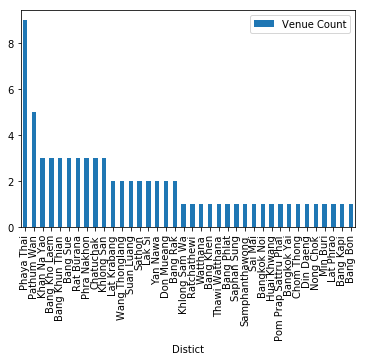

In [295]:
df3.plot(kind='bar', x='Distict', y='Venue Count', rot=0)
plt.xticks(rotation=90)
plt.show()

In [296]:
# one hot encoding
istanbul_onehot = pd.get_dummies(istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
istanbul_onehot['Borough'] = istanbul_venues['Borough'] 

# move neighborhood column to the first column
list_column = istanbul_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
istanbul_onehot = istanbul_onehot[list_column]

istanbul_onehot.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.659200,100.399100,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.659200,100.399100,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.659200,100.399100,Lotus Express (โลตัส เอ็กซ์เพรส),13.657839,100.397243,Convenience Store
3,Bang Bon,13.659200,100.399100,Tesco Lotus Express thanon ekkachai bangbon,13.657758,100.397366,Shopping Mall
4,Bang Bon,13.659200,100.399100,Lotus Express Bongbon,13.657630,100.397325,Grocery Store
...,...,...,...,...,...,...,...
1157,Yan Nawa,13.696944,100.543056,Lavita Coffee,13.698132,100.540867,Coffee Shop
1158,Yan Nawa,13.696944,100.543056,Food Court,13.696740,100.541071,Food Court
1159,Yan Nawa,13.696944,100.543056,KFC (เคเอฟซี),13.700420,100.540930,Fast Food Restaurant
1160,Yan Nawa,13.696944,100.543056,Rumruay Pochana (ร่ำรวยโภชนา),13.699501,100.541553,Chinese Restaurant


In [300]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [297]:
def top_venues_sorted(num_top_venues, borough_grouped):
    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = borough_grouped['Neighborhood']

    for ind in np.arange(borough_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(borough_grouped.iloc[ind, :], num_top_venues)

    return neighborhoods_venues_sorted

In [301]:
df_sort = top_venues_sorted(10, df)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [ ]:
all_toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

all_toronto_merged = df

all_toronto_merged = all_toronto_merged.join(all_toronto_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

all_toronto_merged.head()